###  Introduction
Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.

Effects of features on the price

Predict the price of Cars using different Variables

### Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading and Reading Data

In [33]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Cleaning: Cleaning Strings in Column and values

In [34]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Making List of Categorical Columns

In [35]:


strings = list(df.dtypes[df.dtypes == 'object'].index)
strings


# Other methods 
# list(df.select_dtypes(include = 'O').columns)
# [col for col in df.columns if df[col].dtype == 'object']

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

### Cleaning Categorical Data in our data set

In [36]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

## Unique values and their numbers

In [37]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print('\n')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48


model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914


year
[2011 2012 2013 1992 1993]
28


engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10


engine_hp
[335. 300. 230. 320. 172.]
356


engine_cylinders
[ 6.  4.  5.  8. 12.]
9


transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5


driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4


number_of_doors
[ 2.  4.  3. nan]
3


market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71


vehicle_size
['compact' 'midsize' 'large']
3


vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16


highway_mpg
[26 28 27 25 24]
59


city_mpg
[19 20 18 17 16]
69


popularity
[3916 3105  819  617 1013]
48


msrp
[46135 40650 

### Distribution of price

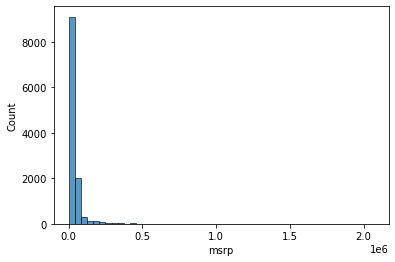

In [38]:
sns.histplot(df['msrp'], bins = 50);

### Distribution of price with msrp less than 100000

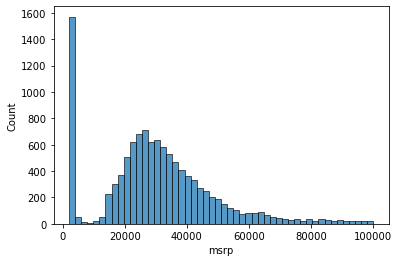

In [39]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins = 50);

### Log(msrp +1)

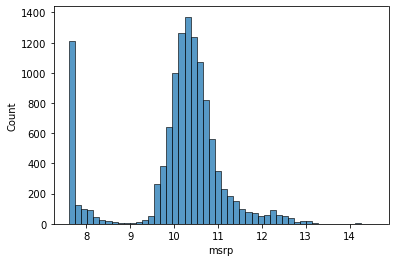

In [40]:
price_logs = np.log1p(df['msrp'])
sns.histplot(price_logs, bins = 50);

### Missing Values

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


<AxesSubplot:>

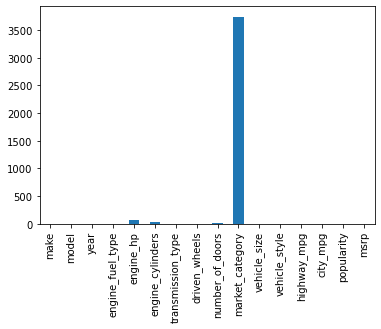

In [41]:
print(df.isnull().sum())
df.isnull().sum().plot(kind = 'bar')

### Validation Framework: Creating Train Validation and Test Split Manually

In [42]:

n  = len(df)    

n_val = int(n * 0.2)  # Creating Validation Set
n_test = int(n * 0.2) # Creating test set
n_train = n - n_val - n_test


idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)



df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]



df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)




y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

## Linear Regression

In [43]:

xi = [453, 11, 86] 


w0 = 0

w =  [1, 1, 1]

"""
Creating Linear Regression Function
"""
def linear_regression(xi):
    n =len(xi)                # Number of features used
    
    pred = w0                 # Initial / Base prediction
    
    for j in range(n):
        pred += w[j]*xi[j]     # Formula = w0 +sigma[0:n-1]{w[j]*xi[j]}
    
    return pred

linear_regression(xi)

550

In [44]:

w0 = 7.17

w =  [0.01, 0.04, 0.002]

linear_regression(xi)

12.312

In [45]:

print("predicted prices: ", np.expm1(12.312))

predicted prices:  222347.2221101062


# Linear Regression Vector Form 

#  Generalized Linear Regression

In [46]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res += xi[j]*w[j]
    return res

"""
Improvising linear_regression
"""
def linear_regression(xi):
    return w0 + dot(xi,w)


w_new = [w0] + w
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)


linear_regression(xi)

12.312

### Linear Regression with Multiple Variables

In [86]:


w0 = 7.17

w =  [0.01, 0.04, 0.002]


w_new = [w0] + w

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]


X= [x1, x2, x10]
X = np.array(X)

def linear_regression(X):
    return X.dot(w_new)


linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training Linear Regression - Normal Equationraining Linear Regression - Normal Equation

In [48]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]
 

X = np.array(X)



y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 120]



In [49]:
XTX = X.T.dot(X)

"""inverse of Gram Matrix"""
XTX_inv = np.linalg.inv(XTX)

# XTX.dot(XTX_inv).round(1)
XTX.dot(XTX_inv)


w_full = XTX_inv.dot(X.T).dot(y)


w0 = w_full[0]
w = w_full[1:]

w0, w

(18.795976557583153, array([260.65006106,   5.07672498]))

In [50]:
"""Creating a function for Training Linear Regression Model"""
def train_linear_regression(X,y):
    """
    Including a biased term
    """
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    """
    Gram Matrix
    """
    XTX = X.T.dot(X)
    
    """inverse of Gram Matrix"""
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]   




### Car Price Baseline Model

In [51]:

df_train.dtypes


base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']


X_train = df_train[base].values

train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [52]:
"""
checking missing values in our subset
"""
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [53]:
X_train = df_train[base].fillna(0).values

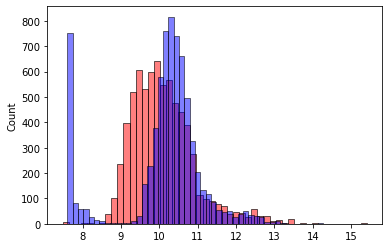

In [54]:
w0, w = train_linear_regression(X_train,y_train)


y_pred =  w0 + X_train.dot(w)


sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50);

### Root Mean Squared Error (RMSE)

In [55]:
def rmse(y,y_pred):
    error  = y- y_pred
    squared_error = error ** 2
    mse = squared_error.mean()
    return np.sqrt(mse)  

In [56]:
rmse(y_train,y_pred)

0.7554192603920132

###  Validating the Model using RMSE

In [57]:
"""
Creating subset of only Numerical Columns
"""
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [58]:
X_train = prepare_X(df_train)                            # Preparing Training set


w0,w = w0, w = train_linear_regression(X_train,y_train)  # Building the model on Train set


X_val = prepare_X(df_val)                                 # Preparing Validation Set
y_pred = w0 + X_val.dot(w)                                # Prediction on Validation Set


rmse(y_val, y_pred)                                       # Calculating RMSE for Validation Set 

0.7616530991301594

###  Feature Engineering

In [59]:
"""
Modifying prepare_S function to include Feature engineering step
"""
def prepare_X(df):
    df = df.copy()
    df['age'] = max(df['year']) - df['year']
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
X_train = prepare_X(df_train)

In [61]:
X_train = prepare_X(df_train)                            # Preparing Training set

w0,w = w0, w = train_linear_regression(X_train,y_train)  # Building the model on Train set

 = prepare_X(df_val)                                 # Preparing Validation Set
y_pred = w0 + X_val.dot(w)                                # Prediction on Validation Set

rmse(y_val, y_pred)                                       # Calculating RMSE for Validation Set 

IndentationError: unexpected indent (<ipython-input-61-b27af87081a0>, line 5)

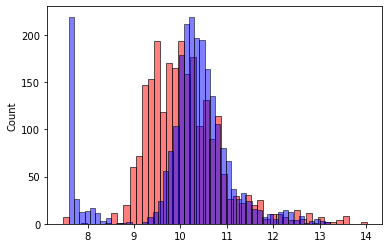

In [62]:

"""Visualizing the Predictions"""
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50);

### Categorical Variables

In [63]:
"""Top 5 makers"""
makes = list(df['make'].value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [64]:
"""
Modifying prepare_S function for Creating new columns for number of doors
Making columns for top 5 makes of the cars
"""
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = max(df['year']) - df['year']    
    features.append('age')
    

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int') 
        features.append('num_doors_%s' %v)
      
    for m in makes:
        df['make_%s' %m] = (df['make'] == m).astype('int') 
        features.append('make_%s' %m)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [65]:
X_train = prepare_X(df_train)                            # Preparing Training set


w0,w = train_linear_regression(X_train,y_train)  # Building the model on Train set


X_val = prepare_X(df_val)                                 # Preparing Validation Set
y_pred = w0 + X_val.dot(w)                                # Prediction on Validation Set


rmse(y_val, y_pred)                                       # Calculating RMSE for Validation Set 

0.5076038849555671

In [66]:
categorical_variables = ['make','engine_fuel_type', 'transmission_type' , 'driven_wheels', 'market_category', 
'vehicle_size', 'vehicle_style' ]           

In [67]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


In [68]:
categories.items()

dict_items([('make', ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']), ('engine_fuel_type', ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']), ('transmission_type', ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']), ('driven_wheels', ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']), ('market_category', ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']), ('vehicle_size', ['compact', 'midsize', 'large']), ('vehicle_style', ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'])])

In [69]:

def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = max(df['year']) - df['year']    
    features.append('age')
    
   
    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int') 
        features.append('num_doors_%s' %v)
        
  
    for c,values in categories.items():
        for v in values:
            df["%s_%s" %(c,v)] = (df[c] == v).astype('int') 
            features.append("%s_%s" %(c,v))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [70]:

X_train = prepare_X(df_train)                            # Preparing Training set

w0,w = train_linear_regression(X_train,y_train)  # Building the model on Train set

_val = prepare_X(df_val)                                 # Preparing Validation Set
y_pred = w0 + X_val.dot(w)                                # Prediction on Validation Set


rmse(y_val, y_pred)                                       # Calculating RMSE for Validation Set 

ValueError: shapes (2382,14) and (41,) not aligned: 14 (dim 1) != 41 (dim 0)

### Regularization

In [71]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
   
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.456521990118657

## Tuning the Model

In [73]:
"""
Training the model for different values of r: regularization term
"""
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -4549127492855609.0 52.08765237410741
1e-05 3.7204792219042004 0.45651702775634717
0.0001 6.254240878313915 0.45651706457624014
0.001 6.285613424445728 0.4565175086094597
0.1 6.191208642500289 0.4565692763037788
1 5.634896668260641 0.45722043179960414
10 4.283980108959954 0.4701456932100265


In [74]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4565175086094597

## Using the model

In [75]:
"""Concatnating the datasets: train and valid"""
df_full_train = pd.concat([df_train, df_val])

In [76]:
"""Full Train dataset with index dropped. As they are of no use."""
df_full_train = df_full_train.reset_index(drop=True)

In [77]:
"""Creating X and y"""
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

In [78]:
"""Building model"""
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [79]:
"""Preparing X, Predicting and Evaluating model"""
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4517749309383914

In [80]:
"""Checking our model on random car selected"""
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [81]:
"""Making dataset out of given dictionary"""
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [82]:
"""Creating X"""
X_small = prepare_X(df_small)

In [83]:
"""Predicting y"""
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.656470061051593

In [84]:
"""Undoing Log by using exp"""
np.expm1(y_pred)

42465.46824585576

In [85]:
"""Checking what was the real value of that car."""
np.expm1(y_test[20])

35000.00000000001